### Importing the required Libraries for data Analaysis .

### Reading the 12 month csv files and then converting it into a single csv file.

In [51]:
# Importing the libraries for data manipulation and data wrangling
import pandas as pd
import numpy as np
import os
from itertools import combinations
from collections import Counter

# Importing the libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
Jan_data = pd.read_csv('Sales_January_2019.csv')
Feb_data = pd.read_csv('Sales_February_2019.csv')
Mar_data = pd.read_csv('Sales_March_2019.csv')
Apr_data = pd.read_csv('Sales_April_2019.csv')
May_data = pd.read_csv('Sales_May_2019.csv')
Jun_data = pd.read_csv('Sales_June_2019.csv')
Jul_data = pd.read_csv('Sales_July_2019.csv')
Aug_data = pd.read_csv('Sales_August_2019.csv')
Sep_data = pd.read_csv('Sales_September_2019.csv')
Oct_data = pd.read_csv('Sales_October_2019.csv')
Nov_data = pd.read_csv('Sales_November_2019.csv')
Dec_data = pd.read_csv('Sales_December_2019.csv')

In [3]:
All_month_data = pd.DataFrame()

All_month_data = pd.concat([Jan_data, Feb_data, Mar_data, Apr_data, May_data, Jun_data, Jul_data, Aug_data,
                           Sep_data, Oct_data, Nov_data, Dec_data])

In [4]:
All_month_data.to_csv('All_Data.csv', index=False)

### Reading the "All_Data.csv" to Start the analysis

In [5]:
# Reading the Sales data 
Sales_Data = pd.read_csv('All_Data.csv')
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
# Checking the shape of the Sales Data
Sales_Data.shape

(186850, 6)

In [7]:
# Checking the Datatypes of the columns 
Sales_Data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
# Renaming the Column names of the Data set
new_cols_dict = {
    'Order ID':'Order_Id',
    'Product':'Product',
    'Quantity Ordered':'Quantity_Ordered',
    'Price Each':'Price_Each',
    'Order Date':'Order_Date',
    'Purchase Address':'Purchase_Address'
}

Sales_Data.rename(new_cols_dict, axis=1, inplace=True)

In [9]:
# Checking the Data Types
Sales_Data.dtypes

Order_Id            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [10]:
Sales_Data.columns

Index(['Order_Id', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

### Changing the Data types to the desired Data types

In [11]:
Sales_Data.Order_Date = pd.to_datetime(Sales_Data.Order_Date, errors ='coerce')

In [20]:
Sales_Data.Order_Id = Sales_Data.Order_Id.astype('int')

In [21]:
Sales_Data.Quantity_Ordered = Sales_Data.Quantity_Ordered.astype('int')

In [22]:
Sales_Data.Price_Each = Sales_Data.Price_Each.astype('float')

In [23]:
Sales_Data.dtypes

Order_Id                     int32
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

In [24]:
Sales_Data.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [25]:
# Checking for duplicated Rows
Sales_Data.duplicated().sum()

0

In [13]:
# Dropping the duplicated Rows
Sales_Data.drop_duplicates(inplace=True)

In [14]:
# Checking for the Shape to see of the Duplicated rows has been deleted or not
Sales_Data.shape

(185688, 6)

In [15]:
# Checking for Null Values
Sales_Data.isnull().sum()

Order_Id            1
Product             1
Quantity_Ordered    1
Price_Each          1
Order_Date          2
Purchase_Address    1
dtype: int64

In [16]:
# Dropping the Null Values
Sales_Data.dropna(inplace=True)

In [17]:
Sales_Data.shape

(185686, 6)

In [18]:
Sales_Data.dtypes

Order_Id                    object
Product                     object
Quantity_Ordered            object
Price_Each                  object
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

In [19]:
#Sales_Data.to_csv("All_sales_data_2019.csv", index = False)

### Starting with the analysis by Answering some questions.

### Q1. What was the best month for Sales? and How much was earned that month

### Extracting the month form the Order Date column and adding the new month column in the Sales Data.

In [26]:
# Adding the month columns
Sales_Data['Order_Month'] = Sales_Data.Order_Date.dt.month

In [27]:
Sales_Data.dtypes

Order_Id                     int32
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Order_Month                  int64
dtype: object

### Adding the Sales Column in the Sales Data Frame

In [28]:
Sales_Data.Product.value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [29]:
Sales_Data['Sales'] = Sales_Data.Quantity_Ordered * Sales_Data.Price_Each

In [30]:
Sales_Data

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99


Text(0, 0.5, 'Number of Sales')

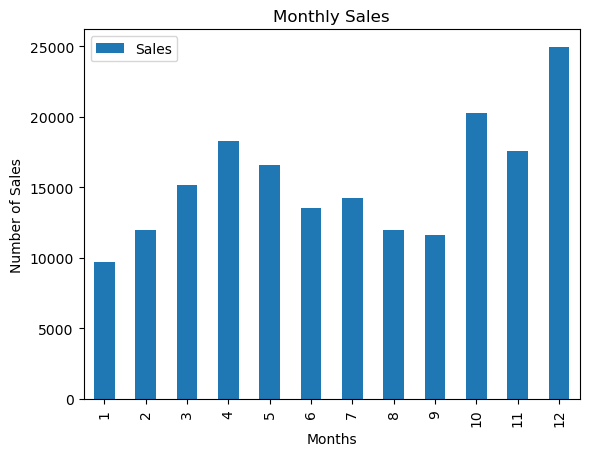

In [31]:
Sales_Data.groupby('Order_Month').count()['Sales'].plot(kind = 'bar')
plt.title('Monthly Sales')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Number of Sales')

In [32]:
'''sales_count = Sales_Data.groupby('Order_Month').count()['Sales']

# Plotting the bar chart
ax = sales_count.plot(kind='bar')

# Adding labels to each bar
for i, v in enumerate(sales_count):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Monthly Sales')
plt.legend()
plt.show()'''

"sales_count = Sales_Data.groupby('Order_Month').count()['Sales']\n\n# Plotting the bar chart\nax = sales_count.plot(kind='bar')\n\n# Adding labels to each bar\nfor i, v in enumerate(sales_count):\n    ax.text(i, v, str(v), ha='center', va='bottom')\n\nplt.title('Monthly Sales')\nplt.legend()\nplt.show()"

In [33]:
Sales_Data.groupby('Order_Month').sum()['Sales']

Order_Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

### The best month for sales is December with a total sale of 24944 with a amount of 4608295.70 dollars.

### Q2. What City sold the most products?

### Adding the City column in the Sales data set

In [34]:
Sales_Data['City'] = Sales_Data.Purchase_Address.apply(lambda x: x.split(',')[1])
Sales_Data

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas


In [35]:
Sales_Data.City.value_counts()

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

Text(0, 0.5, 'Number of Products')

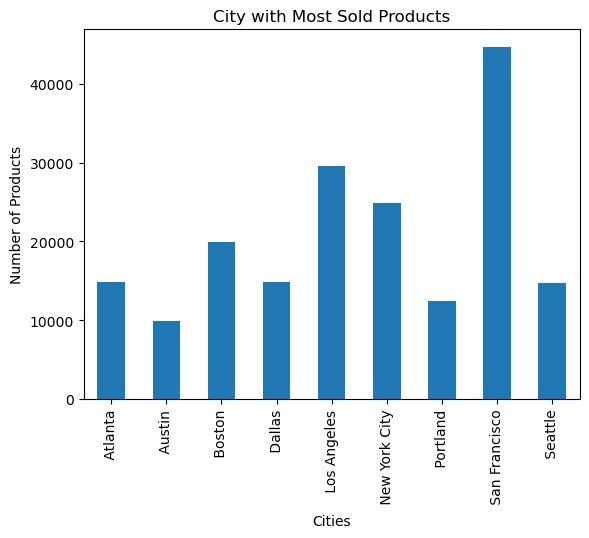

In [86]:
Sales_Data.groupby('City').count()['Product'].plot(kind = 'bar')
plt.title('City with Most Sold Products')
plt.xlabel('Cities')
plt.ylabel('Number of Products')


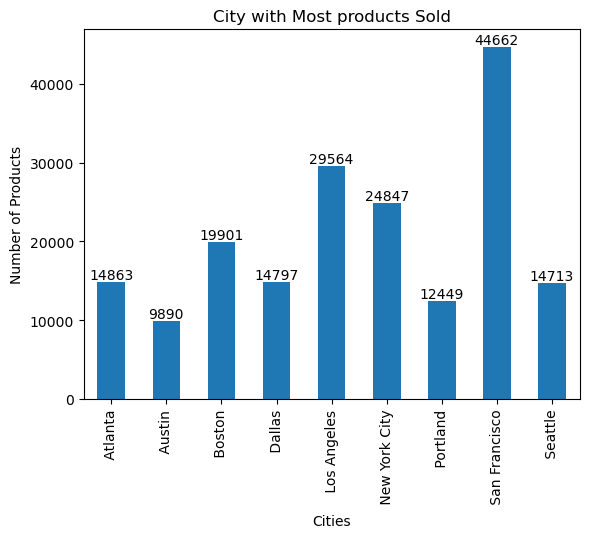

In [38]:
Cities = Sales_Data.groupby('City').count()['Product']

# Plotting the bar chart
ax = Cities.plot(kind='bar')

# Adding labels to each bar
for i, v in enumerate(Cities):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('City with Most products Sold')
plt.xlabel('Cities')
plt.ylabel('Number of Products')
plt.show()

In [39]:
Sales_Data.groupby('City').count()['Product'].sort_values(ascending=False)

City
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: Product, dtype: int64

### Q3.What time should we display advertisements to maximize the likelihood of customer's buying product?

In [40]:
Sales_Data.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin


### Adding the Hour Column to the data set

In [41]:
Sales_Data['Hour'] = Sales_Data.Order_Date.dt.hour
Sales_Data['Minute'] = Sales_Data.Order_Date.dt.minute
Sales_Data.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,59


In [42]:
Sales_Data.groupby(['Hour']).count()['Product']

Hour
0      3902
1      2347
2      1242
3       830
4       852
5      1320
6      2481
7      4002
8      6252
9      8740
10    10929
11    12392
12    12573
13    12115
14    10965
15    10159
16    10359
17    10884
18    12263
19    12886
20    12218
21    10905
22     8808
23     6262
Name: Product, dtype: int64

Text(0, 0.5, 'Products Sold')

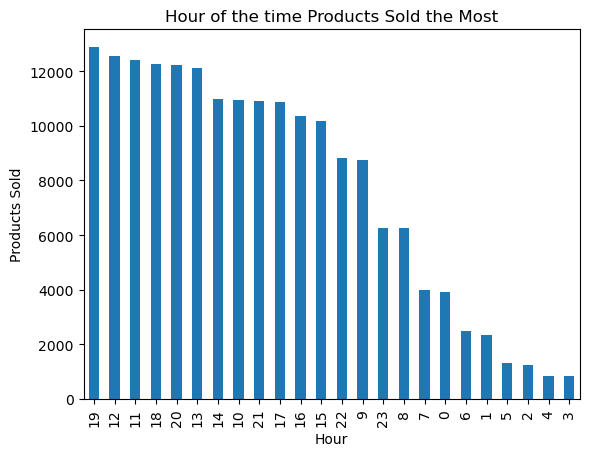

In [62]:
Sales_Data.groupby(['Hour']).count()['Product'].sort_values(ascending=False).plot(kind = 'bar')
plt.title('Hour of the time Products Sold the Most')
plt.xlabel('Hour')
plt.ylabel('Products Sold')

### Q4. What Products are most often sold together?

In [44]:
Sales_Data.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,59


In [45]:
New_Sales_data = Sales_Data[Sales_Data['Order_Id'].duplicated(keep=False)]
New_Sales_data

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,19
...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland,0,30
186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City,8,44
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City,8,44
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin,22,35


In [46]:
New_Sales_data.shape


(14128, 11)

In [47]:
New_Sales_data.groupby('Order_Id').count()['Product'].value_counts()

2    6526
3     337
4      15
5       1
Name: Product, dtype: int64

In [48]:
New_Sales_data['Grouped'] = New_Sales_data.groupby('Order_Id')['Product'].transform(lambda x: ', '.join(x))
New_Sales_data

C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_21536\3156928017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Sales_data['Grouped'] = New_Sales_data.groupby('Order_Id')['Product'].transform(lambda x: ', '.join(x))


,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Sales,City,Hour,Minute,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,6,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,6,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,25,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,25,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,19,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland,0,30,"iPhone, Wired Headphones"
186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City,8,44,"iPhone, Lightning Charging Cable"
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City,8,44,"iPhone, Lightning Charging Cable"
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin,22,35,"34in Ultrawide Monitor, Lightning Charging Cable"


In [49]:
New_Sales_data = New_Sales_data[['Order_Id', 'Grouped']].drop_duplicates()

In [50]:
New_Sales_data

,Order_Id,Grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
186710,319536,"Macbook Pro Laptop, Wired Headphones"
186731,319556,"Google Phone, Wired Headphones"
186760,319584,"iPhone, Wired Headphones"
186773,319596,"iPhone, Lightning Charging Cable"


### For the Item that are sold together, number of products together - 2

In [52]:
count = Counter()

for items in New_Sales_data['Grouped']:
    items_list = items.split(', ')
    count.update(Counter(combinations(items_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### For the Item that are sold together, number of products together - 3

In [53]:
count = Counter()

for items in New_Sales_data['Grouped']:
    items_list = items.split(', ')
    count.update(Counter(combinations(items_list, 3)))
    
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### For the Item that are sold together, number of products together - 4

In [54]:
count = Counter()

for items in New_Sales_data['Grouped']:
    items_list = items.split(', ')
    count.update(Counter(combinations(items_list, 4)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', '27in FHD Monitor') 1


### Q5. What Product sold the most ? and why do you think it was sold the most?

In [56]:
Sales_Data.head()

,Order_Id,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,59


In [65]:
Sales_Data.groupby('Product').sum()['Quantity_Ordered'].sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30986.0
AA Batteries (4-pack)         27615.0
USB-C Charging Cable          23931.0
Lightning Charging Cable      23169.0
Wired Headphones              20524.0
Apple Airpods Headphones      15637.0
Bose SoundSport Headphones    13430.0
27in FHD Monitor               7541.0
iPhone                         6847.0
27in 4K Gaming Monitor         6239.0
34in Ultrawide Monitor         6192.0
Google Phone                   5529.0
Flatscreen TV                  4813.0
Macbook Pro Laptop             4725.0
ThinkPad Laptop                4128.0
20in Monitor                   4126.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Name: Quantity_Ordered, dtype: float64

Text(0, 0.5, 'Qunatity Sold')

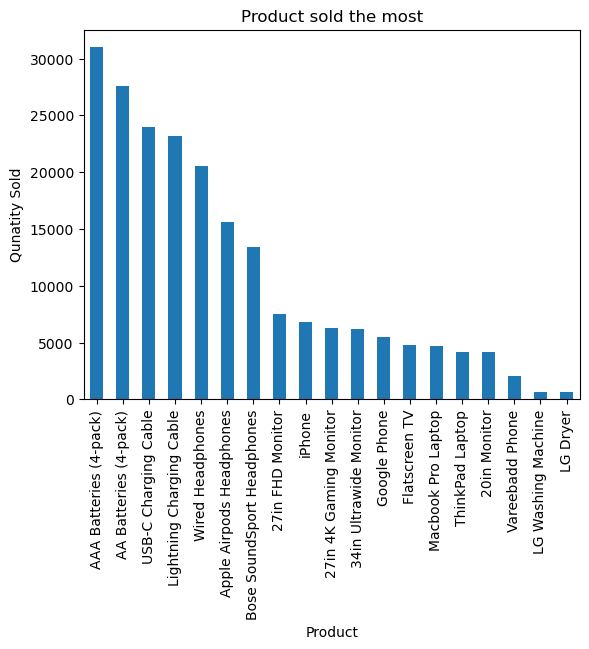

In [68]:
Sales_Data.groupby('Product').sum()['Quantity_Ordered'].sort_values(ascending=False).plot(kind = 'bar')
plt.title('Product sold the most')
plt.ylabel('Qunatity Sold')

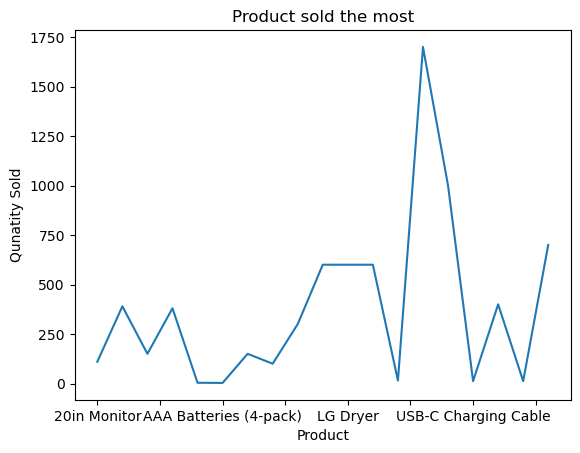

In [76]:
products = Sales_Data.groupby('Product').mean()['Price_Each']

# Plotting the bar chart
ax = products.plot(kind='line')

# Adding labels to each bar
#for i, v in enumerate(products):
#    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Product sold the most')
plt.ylabel('Qunatity Sold')
plt.xlabel
plt.show()

<AxesSubplot:xlabel='Product'>

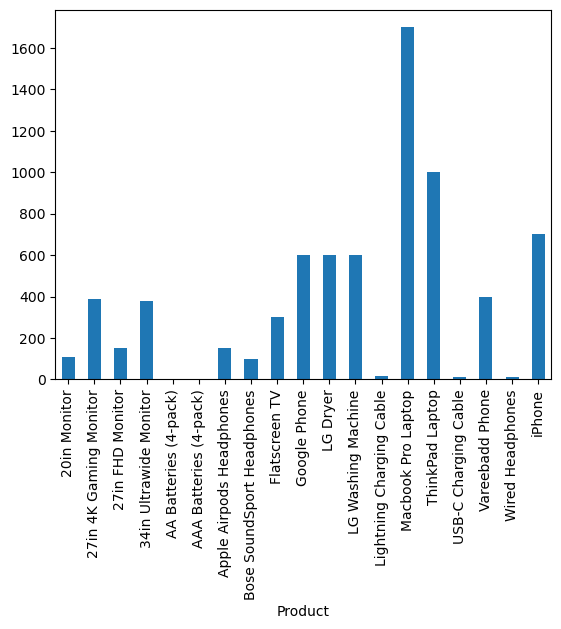

In [82]:
Sales_Data.groupby('Product').mean()['Price_Each'].plot(kind = 'bar')


In [83]:
Sales_Data.to_csv('All_Sales_Data_2019_Final.csv', index = False)